## Logistic Reggression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#from collections import Counter
#plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('display.float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Load and Check Dataset

In [2]:
train_df = pd.read_csv("TitanicPreprocessed.csv")

In [3]:
train_df.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'IsChild', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP', 'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX', 'FamilySize', 'Singleton', 'SmallFamily', 'LargeFamily', 'Survived'], dtype='object')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             891 non-null    int64  
 1   Age             891 non-null    float64
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   Title_Master    891 non-null    int64  
 6   Title_Miss      891 non-null    int64  
 7   Title_Mr        891 non-null    int64  
 8   Title_Mrs       891 non-null    int64  
 9   Title_Officer   891 non-null    int64  
 10  Title_Royalty   891 non-null    int64  
 11  Embarked_C      891 non-null    int64  
 12  Embarked_Q      891 non-null    int64  
 13  Embarked_S      891 non-null    int64  
 14  Cabin_A         891 non-null    int64  
 15  Cabin_B         891 non-null    int64  
 16  Cabin_C         891 non-null    int64  
 17  Cabin_D         891 non-null    int

In [5]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
list(train_df.columns)

['Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Officer',
 'Title_Royalty',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_T',
 'Cabin_U',
 'IsChild',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Ticket_A',
 'Ticket_A4',
 'Ticket_A5',
 'Ticket_AQ3',
 'Ticket_AQ4',
 'Ticket_AS',
 'Ticket_C',
 'Ticket_CA',
 'Ticket_CASOTON',
 'Ticket_FC',
 'Ticket_FCC',
 'Ticket_Fa',
 'Ticket_LINE',
 'Ticket_LP',
 'Ticket_PC',
 'Ticket_PP',
 'Ticket_PPP',
 'Ticket_SC',
 'Ticket_SCA3',
 'Ticket_SCA4',
 'Ticket_SCAH',
 'Ticket_SCOW',
 'Ticket_SCPARIS',
 'Ticket_SCParis',
 'Ticket_SOC',
 'Ticket_SOP',
 'Ticket_SOPP',
 'Ticket_SOTONO2',
 'Ticket_SOTONOQ',
 'Ticket_SP',
 'Ticket_STONO',
 'Ticket_STONO2',
 'Ticket_STONOQ',
 'Ticket_SWPP',
 'Ticket_WC',
 'Ticket_WEP',
 'Ticket_XXX',
 'FamilySize',
 'Singleton',
 'SmallFamily',
 'LargeFamily',
 'Survived']

In [7]:
 train_df.sample(10)   

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,IsChild,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
409,0,18.00,3,1,25.47,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,1,0
124,1,54.00,0,1,77.29,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0,0
424,1,18.00,1,1,20.21,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,0,0
841,1,16.00,0,0,10.50,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
567,0,29.00,0,4,21.07,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,1,0
801,0,31.00,1,1,26.25,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1
827,1,1.00,0,2,37.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1
639,1,26.00,1,0,16.10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0,0
668,1,43.00,0,0,8.05,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
163,1,17.00,0,0,8.66,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [8]:
 train_df.Fare = train_df.Fare.round()

In [9]:
train_df["Fare"] =train_df["Fare"].astype(int);
train_df["Age"] =train_df["Age"].astype(int);

In [10]:
 train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             891 non-null    int64
 1   Age             891 non-null    int32
 2   SibSp           891 non-null    int64
 3   Parch           891 non-null    int64
 4   Fare            891 non-null    int32
 5   Title_Master    891 non-null    int64
 6   Title_Miss      891 non-null    int64
 7   Title_Mr        891 non-null    int64
 8   Title_Mrs       891 non-null    int64
 9   Title_Officer   891 non-null    int64
 10  Title_Royalty   891 non-null    int64
 11  Embarked_C      891 non-null    int64
 12  Embarked_Q      891 non-null    int64
 13  Embarked_S      891 non-null    int64
 14  Cabin_A         891 non-null    int64
 15  Cabin_B         891 non-null    int64
 16  Cabin_C         891 non-null    int64
 17  Cabin_D         891 non-null    int64
 18  Cabin_E         891 non-null  

In [11]:
neww=train_df[["SibSp","Parch","FamilySize","Singleton","SmallFamily","LargeFamily"]].copy();   
neww.head(8)

,SibSp,Parch,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,0,2,0,1,0
1,1,0,2,0,1,0
2,0,0,1,0,0,0
3,1,0,2,0,1,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,3,1,5,0,0,1


In [12]:
train_df.drop(labels =["SibSp", "Parch","Singleton"], axis = 1, inplace= True)   
#family size is including these 2 info

In [13]:
train_df.head()

,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,IsChild,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,SmallFamily,LargeFamily,Survived
0,1,22,7,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0
1,0,38,71,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1
2,0,26,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,35,53,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,1
4,1,35,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [14]:
#train_df.info()

In [15]:
# Pclass vs Survived
train_df[["Pclass_1", "Survived"]].groupby(["Pclass_1"], as_index = False).mean().sort_values(by= "Survived", ascending= False)

,Pclass_1,Survived
1,1,0.63
0,0,0.31


In [16]:
train_df.Pclass_1.value_counts()

0    675
1    216
Name: Pclass_1, dtype: int64

In [17]:
train_df.Pclass_2.value_counts()

0    707
1    184
Name: Pclass_2, dtype: int64

In [18]:
train_df.Pclass_3.value_counts()

1    491
0    400
Name: Pclass_3, dtype: int64

In [19]:
train_df[["Pclass_2", "Survived"]].groupby(["Pclass_2"], as_index = False).mean().sort_values(by= "Survived", ascending= False)

,Pclass_2,Survived
1,1,0.47
0,0,0.36


In [20]:
train_df[["Pclass_3", "Survived"]].groupby(["Pclass_3"], as_index = False).mean().sort_values(by= "Survived", ascending= False)

,Pclass_3,Survived
0,0,0.56
1,1,0.24


In [21]:
train_df["Age_Category"] = pd.cut(
    x=train_df["Age"],
    bins=[-1,11, 18, 22,27,33,40,66,120],
    labels=["0","1","2","3","4","5","6","7"],
)

#creating age_category column based on age column

In [22]:
train_df["Fare_Category"] = pd.cut(
    x=train_df["Fare"],
    bins=[-1,30,80,200,300,550],
    labels=["1","2","3","4","5"],
)

In [23]:
train_df.describe()

,Sex,Age,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,IsChild,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,SmallFamily,LargeFamily,Survived
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.65,29.18,32.21,0.04,0.21,0.58,0.14,0.02,0.01,0.19,0.09,0.73,0.02,0.05,0.07,0.04,0.04,0.01,0.00,0.00,0.77,0.10,0.24,0.21,0.55,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.05,0.00,0.00,0.01,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.74,1.90,0.33,0.07,0.38
std,0.48,13.56,49.69,0.21,0.41,0.49,0.35,0.14,0.07,0.39,0.28,0.45,0.13,0.22,0.25,0.19,0.19,0.12,0.07,0.03,0.42,0.30,0.43,0.41,0.50,0.00,0.09,0.15,0.00,0.00,0.03,0.07,0.21,0.03,0.03,0.07,0.03,0.07,0.00,0.25,0.06,0.05,0.03,0.00,0.03,0.06,0.03,0.09,0.07,0.08,0.03,0.06,0.05,0.13,0.03,0.12,0.08,0.00,0.05,0.11,0.06,0.44,1.61,0.47,0.25,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,0.00,21.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,1.00,26.00,14.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
75%,1.00,36.50,31.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,0.00,1.00
max,1.00,80.00,512.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,11.00,1.00,1.00,1.00


In [24]:
train_df["Age_Category"] =train_df["Age_Category"].astype(int);
train_df.drop(labels =["Age"], axis = 1, inplace= True);

In [25]:
# train_df['Age'] = train_df['Age'].astype(int)
# train_df["Age"] = [0 if i <=11 else 1 if i>11 & i<=18 else 2 if i>18 & i<=22 else 3 i>22 & i<=27 
#                    else 4 if i>27 & i<=33 else5
#                    if i>33 & i<=40 else 6 i>40 & i<=66 else 7 for i in train_df["Age"]]

In [26]:
train_df["Fare_Category"] =train_df["Fare_Category"].astype(int);
train_df.drop(labels =["Fare"], axis = 1, inplace= True);

In [27]:
train_df.head(3)

,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,IsChild,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,SmallFamily,LargeFamily,Survived,Age_Category,Fare_Category
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,2,1
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,5,2
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,3,1


In [28]:
train_df.drop(labels =["SmallFamily","LargeFamily","IsChild"], axis = 1, inplace= True);

In [29]:
train_df.Pclass_1 = [1 if i == 1 else 0 for i in train_df["Pclass_1"]];
train_df.Pclass_2 = [2 if i == 1 else 0 for i in train_df["Pclass_2"]];
train_df.Pclass_3 = [3 if i == 1 else 0 for i in train_df["Pclass_3"]];

In [30]:
train_df['Pclass']=train_df["Pclass_1"]+train_df["Pclass_2"]+train_df["Pclass_3"] 

In [31]:
train_df.drop(labels =["Pclass_1", "Pclass_2","Pclass_3"], axis = 1, inplace= True) 

In [32]:
train_df.head(10)

,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Survived,Age_Category,Fare_Category,Pclass
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,3
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,5,2,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,3,1,3
3,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,5,2,1
4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,5,1,3
5,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,1,3
6,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,6,2,1
7,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,1,3
8,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,3,1,3
9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,2


In [33]:
train_df.shape

(891, 61)

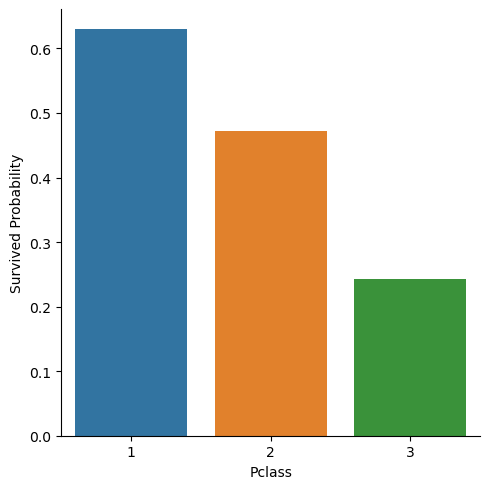

In [34]:
g = sns.factorplot( x = "Pclass", y = "Survived", data = train_df,ci=None, kind = "bar", size = 5)
g.set_ylabels("Survived Probability")
plt.show()
#Here we see clearly, that Pclass is contributing to a persons chance of survival, 
#especially if this person is in class 1

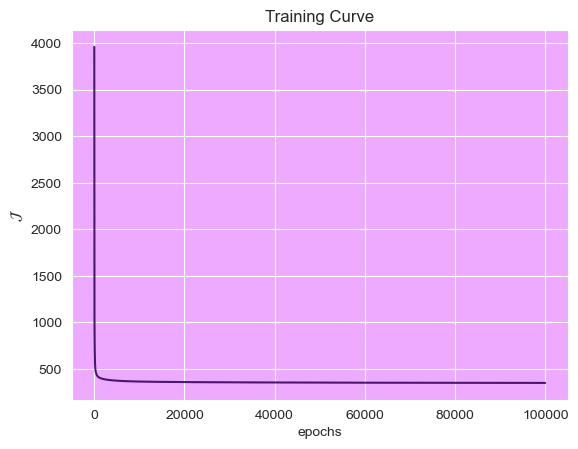

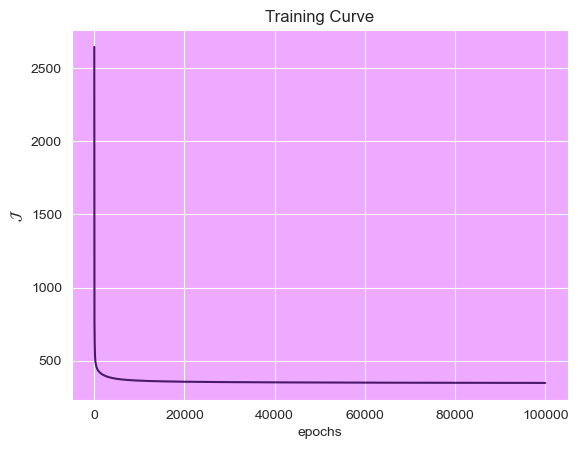

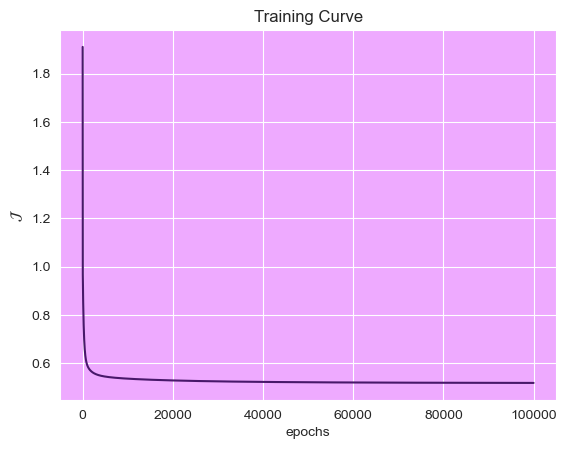

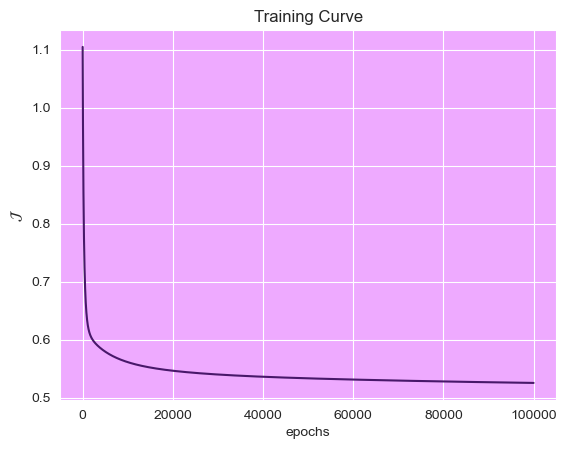

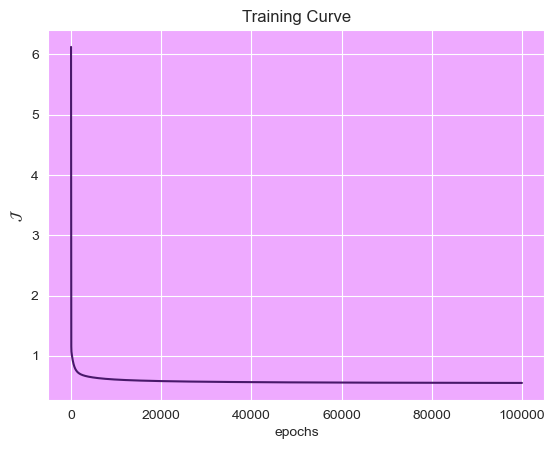

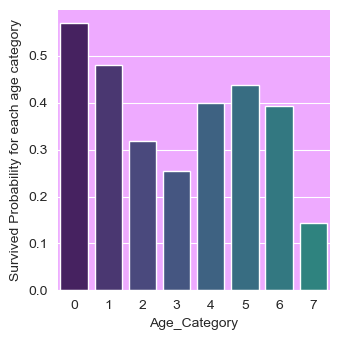

In [188]:
g = sns.catplot( x = "Age_Category", y = "Survived", data = train_df, kind = "bar",ci=None, size = 3.5)
g.set_ylabels("Survived Probability for each age category")
plt.show()

In [36]:
#train_df[["Pclass_3", "Survived"]].groupby(["Pclass_3"], as_index = False).mean().sort_values(by= "Survived", ascending= False)

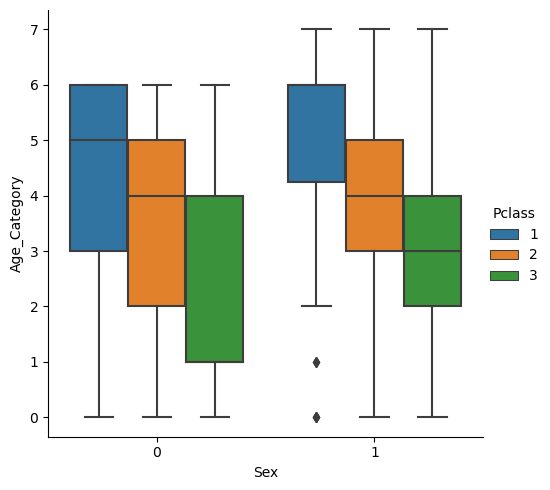

In [37]:
sns.catplot(x = "Sex", y= "Age_Category", hue= "Pclass",ci=None, data = train_df, kind= "box")
plt.show()    #farkli seylere bakicam ki saglikli analiz yapabileyim

In [38]:
# g = sns.FacetGrid(train_df, col = "Survived")   #FacetGrid>>ortalamaya gore dagilimlarini veriyor
# g.map(sns.distplot, "Age_Category", bins= 25) 
# plt.show()

#bu kullanilabilir

##ortalama 40 olduguna gore yigilma 20 ile 40 arasi. bize gore sol ama grafige gore saga yigilmis bir grafik.
#hem olumlerde hem hayatta kalmada ayni.ama yinede yasa gore hayatta kalma cok anlasilmiyor.hemen hemen her yastan olum var

In [39]:
corr = train_df.corr().Survived
corr[np.argsort(corr, axis= 0)[:-1]] 

Title_Mr         -0.55
Sex              -0.54
Ticket_WEP       -0.01
Cabin_U          -0.32
Embarked_S       -0.15
Ticket_A4        -0.07
Ticket_A           NaN
Ticket_SCParis    0.02
Ticket_SOTONOQ   -0.07
Ticket_SWPP       0.06
Ticket_SCOW      -0.03
Ticket_SCPARIS    0.01
Ticket_SCA4      -0.03
Title_Officer    -0.03
Ticket_AS        -0.03
Ticket_C          0.00
Ticket_CASOTON   -0.03
Ticket_SCAH       0.03
Ticket_A5        -0.09
Pclass           -0.34
Ticket_PC         0.15
Ticket_SOC       -0.04
Pclass           -0.34
Pclass           -0.34
Ticket_PPP        0.01
Cabin_T          -0.03
Ticket_AQ4         NaN
Ticket_FC        -0.03
Ticket_SP        -0.03
Ticket_STONO      0.01
Ticket_AQ3         NaN
Embarked_Q        0.00
Pclass           -0.34
Ticket_SOP       -0.03
Ticket_SC         0.04
Ticket_LINE      -0.02
Cabin_G           0.02
Pclass           -0.34
Ticket_SCA3        NaN
Ticket_STONO2     0.02
Ticket_SOPP      -0.05
Cabin_A           0.02
Title_Royalty     0.03
Ticket_PP  

In [40]:
train_df.drop(labels =["Ticket_LP", "Ticket_SCA3","Ticket_AQ3",
                       "Ticket_AQ4","Ticket_C","Ticket_A"], axis = 1, inplace= True)

In [41]:
# corr = train_df.corr().Survived
# corr[np.argsort(corr, axis= 0)[:-1]] 

In [42]:
train_df.drop(labels =["Ticket_STONOQ", "Cabin_A","Ticket_STONO2", "Ticket_XXX",
                      "Ticket_SCParis", "Cabin_G","Ticket_PPP", "Ticket_SCPARIS","Ticket_STONO",
                      "Embarked_Q", "Ticket_WEP","Ticket_WC", "Ticket_LINE","Ticket_CA"], axis = 1, inplace= True) 

In [43]:
corr = train_df.corr().Survived
corr[np.argsort(corr, axis= 0)[:-1]] 

Title_Mr         -0.55
Sex              -0.54
Pclass           -0.34
Cabin_U          -0.32
Embarked_S       -0.15
Ticket_A5        -0.09
Ticket_A4        -0.07
Ticket_SOTONOQ   -0.07
Age_Category     -0.05
Ticket_SOPP      -0.05
Ticket_SOTONO2   -0.04
Ticket_SOC       -0.04
Title_Officer    -0.03
Ticket_CASOTON   -0.03
Ticket_FC        -0.03
Ticket_SOP       -0.03
Ticket_Fa        -0.03
Ticket_AS        -0.03
Ticket_SCA4      -0.03
Ticket_SP        -0.03
Ticket_SCOW      -0.03
Cabin_T          -0.03
FamilySize        0.02
Title_Royalty     0.03
Ticket_SCAH       0.03
Ticket_PP         0.03
Ticket_SC         0.04
Cabin_F           0.06
Ticket_SWPP       0.06
Ticket_FCC        0.06
Title_Master      0.09
Cabin_C           0.11
Cabin_E           0.15
Ticket_PC         0.15
Cabin_D           0.15
Embarked_C        0.17
Cabin_B           0.18
Fare_Category     0.26
Title_Miss        0.33
Title_Mrs         0.34
Name: Survived, dtype: float64

In [44]:
from matplotlib.colors import ListedColormap
cmap_bold=ListedColormap(["#FF0000","#0000FF"])     #EVERYTHING FF>>???
cmap_light=ListedColormap(["#FFBBBB","#BBBBFF"])

In [45]:
train_df.describe()   

,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_T,Cabin_U,Ticket_A4,Ticket_A5,Ticket_AS,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_PC,Ticket_PP,Ticket_SC,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_SWPP,FamilySize,Survived,Age_Category,Fare_Category,Pclass
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.65,0.04,0.21,0.58,0.14,0.02,0.01,0.19,0.73,0.05,0.07,0.04,0.04,0.01,0.00,0.77,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,1.90,0.38,3.42,1.36,2.31
std,0.48,0.21,0.41,0.49,0.35,0.14,0.07,0.39,0.45,0.22,0.25,0.19,0.19,0.12,0.03,0.42,0.09,0.15,0.03,0.03,0.03,0.07,0.03,0.25,0.06,0.03,0.03,0.06,0.03,0.08,0.03,0.06,0.05,0.13,0.03,0.05,1.61,0.49,1.90,0.71,0.84
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00,2.00
50%,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,3.00,1.00,3.00
75%,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,5.00,2.00,3.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,11.00,1.00,7.00,5.00,3.00


In [46]:
train_df["Survivedd"] =train_df["Survived"];
train_df.drop(labels =["Survived"], axis = 1, inplace= True);
train_df.rename(columns={'Survivedd': 'Survived'}, inplace=True);

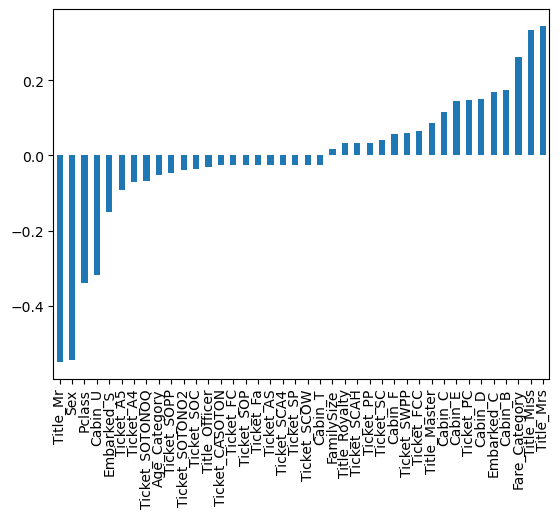

In [47]:
train_df.corr()['Survived'].drop('Survived').sort_values().plot.bar()
plt.show()

In [48]:
# corr = train_df.corr().Survived
# corr[np.argsort(corr, axis= 0)[:-1]] 

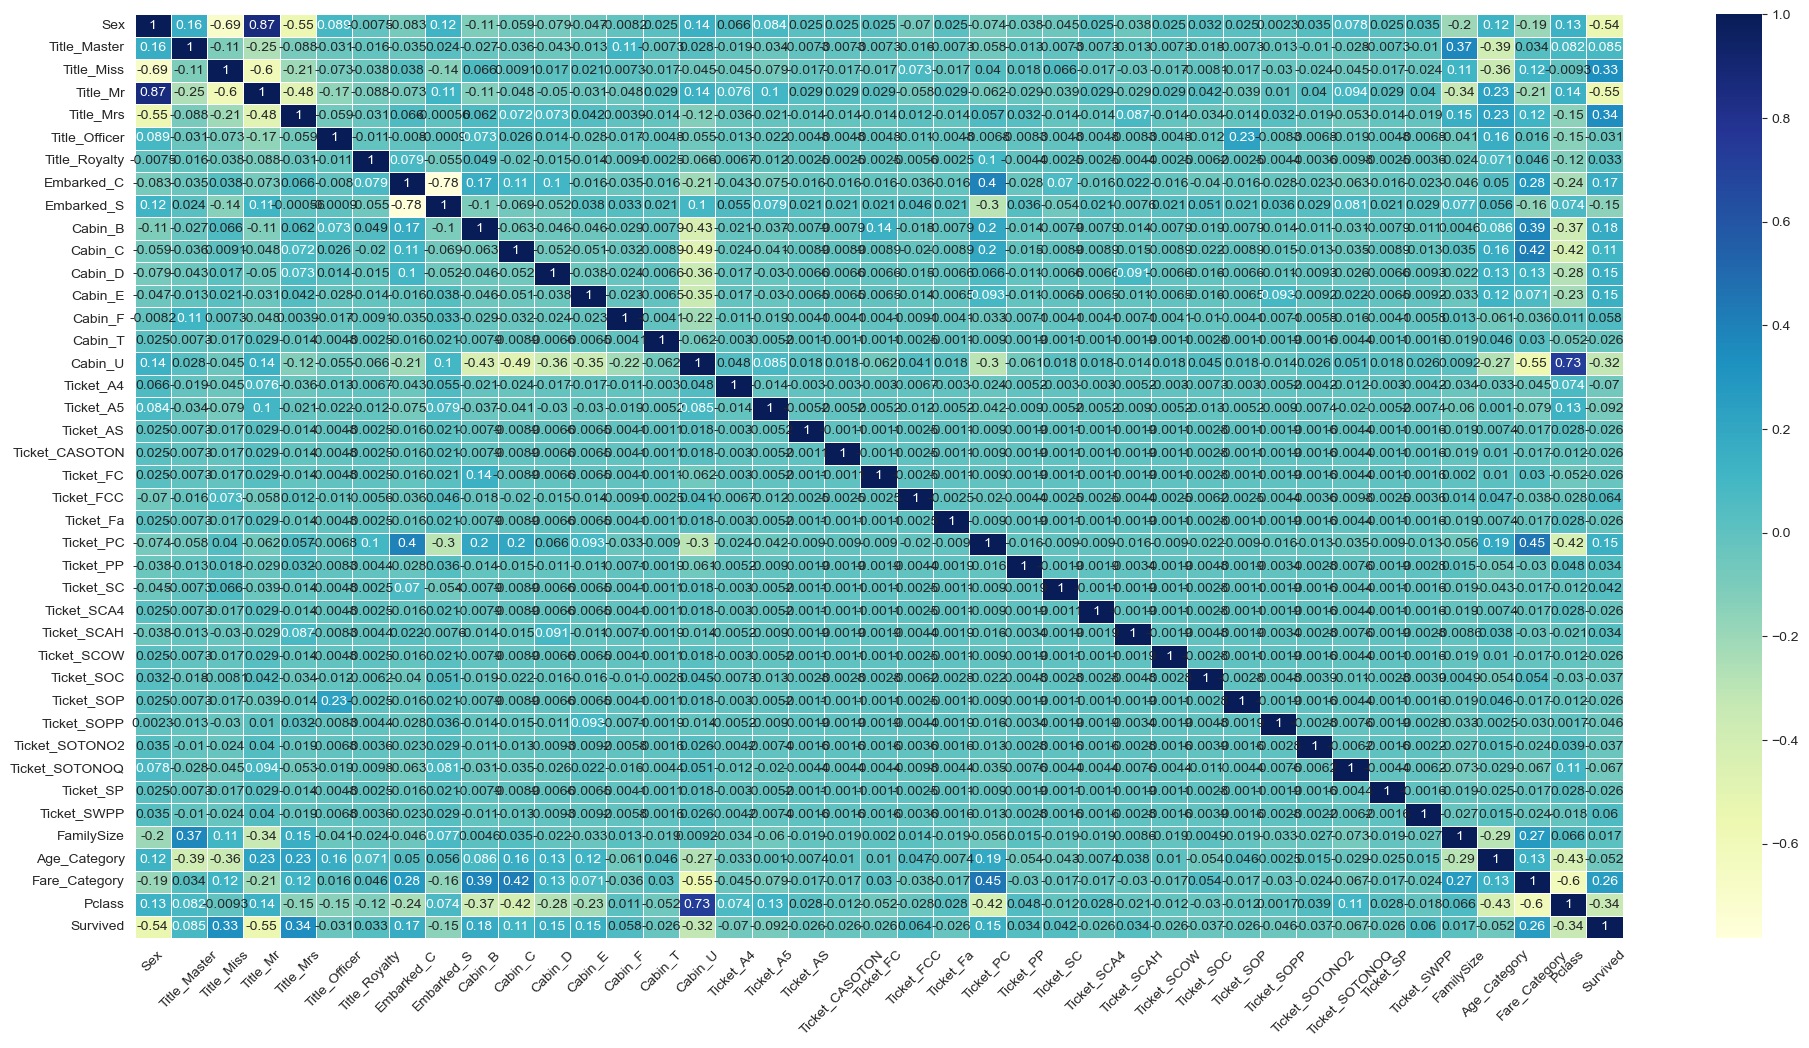

In [49]:
fig=plt.figure(figsize=(24,12))
sns.set_style('darkgrid',rc={'axes.facecolor': '#eaf'})
sns.set_palette('viridis',15)
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu",linewidths=0.5)  
plt.xticks(rotation= 45) 
plt.show()

In [50]:
train_df2=train_df

In [51]:
# train_df.drop(labels =["Title_Officer", "Ticket_CASOTON","Ticket_FC", "Ticket_SOP",
#                       "Ticket_Fa", "Ticket_SCA4","Ticket_AS", "Ticket_SP","Ticket_SCOW",
#                       "Cabin_T", "Ticket_CA","Ticket_LINE", "Ticket_WEP","Ticket_STONO",
#                       "Ticket_SCPARIS", "Ticket_PPP","Cabin_G", "Ticket_SCParis","FamilySize",
#                        "Ticket_STONO2", "Cabin_A","Title_Royalty", "Ticket_SCAH","Ticket_PP"], axis = 1, inplace= True)  

In [52]:
#train_df.columns

In [53]:
# train_df.drop(labels =["Ticket_A5", "Ticket_A4","Ticket_SOTONOQ", "Ticket_WC",
#                       "Ticket_SOPP", "Ticket_SOTONO2","Ticket_SOC", "Ticket_SC","Cabin_F",
#                       "Ticket_SWPP", "Ticket_FCC","Title_Master"], axis = 1, inplace= True)

In [54]:
#train_df2=train_df[["Title_Mr","Sex","Pclass","Cabin_U","SmallFamily","Title_Miss","Title_Mrs","Survived"]].copy();   
#train_df2

In [167]:
def softmax(h):
    return (np.exp(h.T)/np.sum(np.exp(h),axis=1)).T

def cross_entropy(Y,P_hat):
    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def indices_to_one_hot(data,nb_classes):
    targets=np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

def accuracy(y,y_hat):
    return np.mean(y==y_hat)


In [168]:
class MVLogisticRegression():
    def fit(self,X,y,eta=1e-3, epochs=1e3, show_curve=False):
        epochs=int(epochs)
        N,D=X.shape
        
        K=len(np.unique(y))
        y_values=np.unique(y,return_index=False)
        Y=indices_to_one_hot(y,K).astype(int)    #bu Y vektor
        
        #initialize W,B
        self.B=np.random.randn(N,K)
        self.W=np.random.randn(D,K)   #w da vektor
        
        J=np.zeros(epochs)
        for epoch in range(epochs):
            P_hat=self.__forward__(X)
            J[epoch]=cross_entropy(Y,P_hat)
            
            #weights and bias update rules
            self.W-=eta*(1/N)*X.T@(P_hat-Y)
            self.B-=eta*(1/N)*np.sum(P_hat-Y,axis=0)
        
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
    
    def __forward__(self,X):
        return softmax(X@self.W+self.B)
    
    
    def predict(self,X):
        return np.argmax(self.__forward__(X),axis=1)

In [169]:
# class MVLogisticRegression():
#     def fit(self,X,y,eta=1e-3, epochs=1e3, show_curve=False):
#         epochs=int(epochs)
#         N,D=X.shape
        
#         K=len(np.unique(y))
#         y_values=np.unique(y,return_index=False)
#         Y=indices_to_one_hot(y,K).astype(int)    #bu Y vektor
        
#         #initialize W,B
#         self.B=np.random.randn(N,K)       #HOCA 1,K dedi ama calismadi
#         self.W=np.random.randn(D,K)   #w da vektor
        
#         J=np.zeros(epochs)
#         for epoch in range(epochs):
#             P_hat=self.__forward__(X)
#             J[epoch]=cross_entropy(Y,P_hat)
            
#             #weights and bias update rules
#             self.W-=eta*(1/N)*X.T@(P_hat-Y)
#             self.B-=eta*(1/N)*np.sum(P_hat-Y,axis=0)
        
#         if show_curve:
#             plt.figure()
#             plt.plot(J)
#             plt.xlabel("epochs")
#             plt.ylabel("$\mathcal{J}$")
#             plt.title("Training Curve")
    
#     def __forward__(self,X):
#         return sigmoid(X@self.W+self.B)
    
    
# #     def predict(self,X,thresh=0.5):
# #         return (self.__forward__(X)[0]>=thresh).astype(np.int32)  
    
#     def predict(self,X):
#         return np.argmax(self.__forward__(X),axis=1)

#hoca ile bunu yaptik ama calismadi sonradan.tekrar bak

In [170]:
train_df2.head(2)

,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_U,Ticket_A4,Ticket_A5,Ticket_FCC,Ticket_PC,Ticket_SC,Ticket_SOC,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SWPP,Age_Category,Fare_Category,Pclass,Survived
0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1
1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,3,1,1


In [171]:
X=train_df2.to_numpy();
y=X[:,-1];
X=X[:,0:-1];
print("X: {}\ny : {}".format(X.shape, y.shape))

# X=train_df2.to_numpy();
# X=train_df2.drop(labels = "Survived", axis= 1)
# y = X["Survived"].values  #.reshape(-1, 1)
# print("X: {}\ny : {}".format(X.shape, y.shape))

X: (891, 26)
y : (891,)


In [172]:
X

array([[1, 1, 0, ..., 0, 3, 1],
       [0, 0, 0, ..., 5, 3, 1],
       [0, 0, 0, ..., 6, 3, 1],
       ...,
       [1, 0, 0, ..., 2, 1, 3],
       [1, 0, 0, ..., 2, 3, 1],
       [1, 0, 0, ..., 4, 1, 3]], dtype=int64)

In [173]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [174]:
multlogreg=MVLogisticRegression()

In [175]:
multlogreg.fit(X,y,eta=3e-2,epochs=1e5,show_curve=True)  #eta=9e-2,epochs=2e3>80  

In [176]:
y_hat=multlogreg.predict(X)

In [177]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,

In [178]:
accuracy(y,y_hat)

0.8035914702581369

In [66]:
#stop here

In [67]:
# import seaborn as sns
# plt.figure(figsize=(8,3.5))
# y_actu = pd.Series(y, name='Actual')
# y_pred = pd.Series(y_hat, name='Predicted')
# cm = pd.crosstab(y_actu, y_pred)
# ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.02, linecolor='black', annot_kws = {"size": 10})
# plt.ylabel('True label')
# plt.xlabel('Predicted label');

In [68]:
#my_dict={"Actual":y,"Pred":y_hat,"Residual":y-y_hat}

In [69]:
# comparing=pd.DataFrame(my_dict); 
# comparing.sort_values(by="Residual")

In [70]:
# result_sample=comparing.sample(30)
# result_sample.plot(kind="bar",figsize=(10,3))
# plt.show()

In [71]:
#stop here
#y=y2
#X=X2

In [72]:
corr = train_df.corr().Survived
corr[np.argsort(corr, axis= 0)[:-1]]

Title_Mr         -0.55
Sex              -0.54
Pclass           -0.34
Cabin_U          -0.32
Embarked_S       -0.15
Ticket_A5        -0.09
Ticket_A4        -0.07
Ticket_SOTONOQ   -0.07
Age_Category     -0.05
Ticket_SOPP      -0.05
Ticket_SOTONO2   -0.04
Ticket_SOC       -0.04
Title_Officer    -0.03
Ticket_CASOTON   -0.03
Ticket_FC        -0.03
Ticket_SOP       -0.03
Ticket_Fa        -0.03
Ticket_AS        -0.03
Ticket_SCA4      -0.03
Ticket_SP        -0.03
Ticket_SCOW      -0.03
Cabin_T          -0.03
FamilySize        0.02
Title_Royalty     0.03
Ticket_SCAH       0.03
Ticket_PP         0.03
Ticket_SC         0.04
Cabin_F           0.06
Ticket_SWPP       0.06
Ticket_FCC        0.06
Title_Master      0.09
Cabin_C           0.11
Cabin_E           0.15
Ticket_PC         0.15
Cabin_D           0.15
Embarked_C        0.17
Cabin_B           0.18
Fare_Category     0.26
Title_Miss        0.33
Title_Mrs         0.34
Name: Survived, dtype: float64

In [73]:
train_df4=train_df

In [74]:
train_df4.drop(labels =["Title_Officer", "Ticket_CASOTON","Ticket_FC", "Ticket_SOP",
                      "Ticket_Fa", "Ticket_AS","Ticket_SCA4", "Ticket_SP","Ticket_SCOW",
                      "Cabin_T", "FamilySize","Title_Royalty", "Ticket_SCAH","Ticket_PP"], axis = 1, inplace= True) 

In [75]:
corr = train_df4.corr().Survived
corr[np.argsort(corr, axis= 0)[:-1]]

Title_Mr         -0.55
Sex              -0.54
Pclass           -0.34
Cabin_U          -0.32
Embarked_S       -0.15
Ticket_A5        -0.09
Ticket_A4        -0.07
Ticket_SOTONOQ   -0.07
Age_Category     -0.05
Ticket_SOPP      -0.05
Ticket_SOTONO2   -0.04
Ticket_SOC       -0.04
Ticket_SC         0.04
Cabin_F           0.06
Ticket_SWPP       0.06
Ticket_FCC        0.06
Title_Master      0.09
Cabin_C           0.11
Cabin_E           0.15
Ticket_PC         0.15
Cabin_D           0.15
Embarked_C        0.17
Cabin_B           0.18
Fare_Category     0.26
Title_Miss        0.33
Title_Mrs         0.34
Name: Survived, dtype: float64

In [76]:
train_df4.head()

,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_U,Ticket_A4,Ticket_A5,Ticket_FCC,Ticket_PC,Ticket_SC,Ticket_SOC,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SWPP,Age_Category,Fare_Category,Pclass,Survived
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,1,3,0
1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,2,1,1
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,3,1
3,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,1,1
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,1,3,0


In [77]:
X2=train_df4.to_numpy();
y2=X2[:,-1];
X2=X2[:,0:-1];
print("X: {}\ny : {}".format(X.shape, y.shape))

X: (891, 40)
y : (891,)


In [78]:
multlogreg=MVLogisticRegression()

In [179]:
multlogreg.fit(X2,y2,eta=9e-3,epochs=1e5,show_curve=True)  #eta=9e-2,epochs=2e3>80  

In [180]:
y2_hat=multlogreg.predict(X2)

In [181]:
round(accuracy(y2,y2_hat),3)

0.776

In [82]:
#stop here
# X=neww.drop(labels = "Survived", axis= 1)
# X=X.to_numpy();
# y=neww["Survived"].values.reshape(-1, 1)

# Shallow ANN or Multi-Layer Perception

In [83]:
def linear(H):
    return H


def ReLU(H):
    return H*(H>0)


def sigmoid(H):
    return 1/(1+np.exp(-H))


def softmax(H):
    sH=np.exp(H)
    return sH/sH.sum(axis=1,keepdims=True)


def one_hot_encode(y):
    N=len(y)
    K=len(set(y))
    Y=np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]]=1
    return Y


def accuracy(y,y_hat):
    return np.mean(y==y_hat)


def cross_entropy(Y,P_hat):
    return -np.sum(Y*np.log(P_hat))

In [87]:
class Shallow_ANN():
    
    def fit(self,X,y,neurons=10,eta=1e-3,epochs=1e3,show_curve=False):
        epochs=int(epochs)
        Y=one_hot_encode(y)
        N,D=X.shape
        K=Y.shape[1]
        
        #weights and biases initialization
        self.W={l:np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
        self.B={l:np.random.randn(M) for l,M in enumerate([neurons,K],1)}
        
        #define activations
        self.a={1:np.tanh,2:sigmoid}    #2 softmax idi  
        
        J=np.zeros(epochs)
        
        #GradientDescent(optimization)
        for epoch in range(epochs):
            self.__forward__(X)
            J[epoch]=cross_entropy(Y,self.Z[2])
            
            #weights and biases update rules
            #for layer 2  (output layer)
            self.W[2]-=eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
            self.B[2]-=eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
            
            #for layer 1
            self.W[1]-=eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
            self.B[1]-=eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$") 
            plt.title("Training Curve")
            plt.show()
        
    def __forward__(self,X):
        self.Z={0:X}
        
        for l in sorted(self.W.keys()):
            self.Z[l]=self.a[l](self.Z[l-1]@self.W[l]+self.B[l])
            
#     def predict(self,X,thresh=0.5):
#         self.__forward__(X)
#         return (self.Z[L]>=self.thresh).astype(np.int32)   hoca ile bunu yaptik ama calismadi
    #now our output is binary will be
    
    def predict(self,X):
        self.__forward__(X)
        return self.Z[2].argmax(axis=1)

In [88]:
def main():
    D =2
    K = 3
    N= int(K*1e3)
    X = train_df.drop(labels = "Survived", axis= 1)
    X = X.values
    y = train_df["Survived"].values

    my_ann = Shallow_ANN()

    my_ann.fit(X,y, neurons=30, eta =3e-3, epochs=1e+5, show_curve=True)
    y_hat =my_ann.predict(X)

    print (f"Training Accuracy: {accuracy(y,y_hat):0.4f}")

    print(my_ann.W)
    print(my_ann.B)

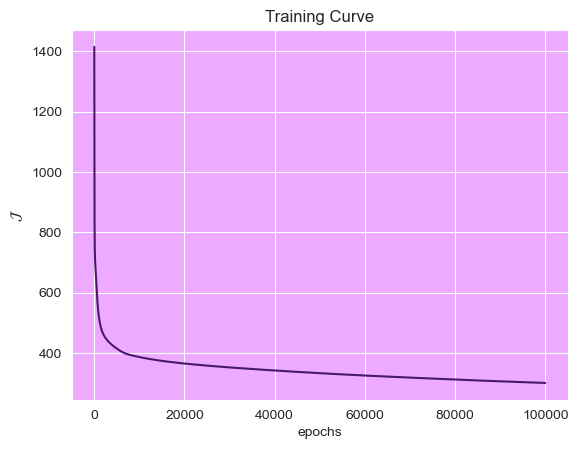

Training Accuracy: 0.8608
{1: array([[-0.59290037,  0.53151689,  0.33948243,  0.8970109 , -3.14102814,
        -1.97655738,  0.08687876,  0.95454729,  1.11904384,  0.68230053,
         1.74743507, -0.52371763, -0.39520694, -1.02691837,  1.20232266,
        -0.22315106, -0.35575439,  0.23374452, -0.94366969,  0.93560609,
         0.168168  ,  0.90489084, -1.58245729,  0.22802644,  0.23350356,
         1.16217356,  2.64253611, -0.43991125, -1.1211617 , -0.05258963],
       [-0.11606321, -2.72346933, -0.88663623,  0.93343904,  1.03878457,
        -0.03981113,  0.50866626,  1.58762423, -0.65594381,  1.41296465,
         0.75771983, -0.70988882, -1.59342452, -0.53222709,  0.22944559,
        -0.82934757, -1.24541853, -1.00512086,  0.69252938, -0.91008245,
        -0.28263249,  0.32525792, -1.23078035, -1.37881466,  1.29601573,
        -0.13470819,  0.52933489,  1.7588301 , -0.35417778,  0.02608586],
       [ 0.87467772,  0.26317854,  0.76657905,  1.05606027,  0.30525884,
         1.26730905

In [89]:
if __name__=="__main__":
    main()  #40, eta =3e-3, epochs=6e+5>>88

In [90]:
def main4():
    D =2
    K = 3
    N= int(K*1e3)
    X = train_df4.drop(labels = "Survived", axis= 1)
    X = X.values
    y = train_df4["Survived"].values

    my_ann = Shallow_ANN()

    my_ann.fit(X,y, neurons=40, eta =3e-3, epochs=6e+5, show_curve=True)
    y_hat =my_ann.predict(X)

    print (f"Training Accuracy: {accuracy(y,y_hat):0.4f}")

    print(my_ann.W)
    print(my_ann.B)

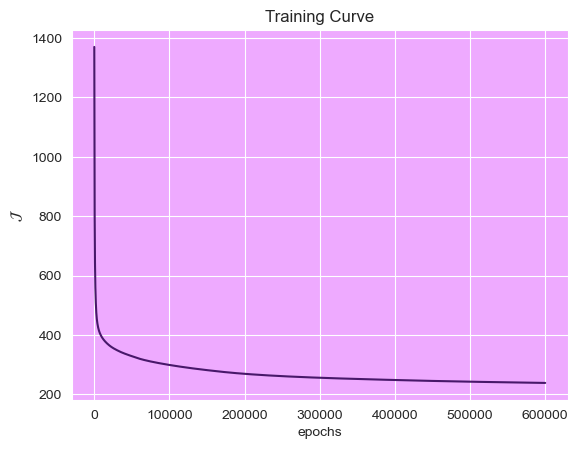

Training Accuracy: 0.8855
{1: array([[ 0.43298648,  1.15429024,  1.75817919, ..., -0.68343469,
         0.19419837, -0.42386542],
       [ 1.6092835 ,  0.03065691,  1.08642553, ...,  1.11711691,
         0.58826229, -1.72025183],
       [-0.99584126, -0.42095386,  1.51628543, ..., -0.51535789,
         2.10092986,  1.29819783],
       ...,
       [-0.20470019,  0.14948373,  1.03170422, ..., -0.80191029,
        -0.72844008, -0.31093605],
       [-0.81537916,  0.3070877 , -2.31989546, ..., -0.75394904,
         0.97729271,  1.34673756],
       [-0.95024178, -0.39054055, -0.68931218, ..., -0.79571307,
        -0.78508738, -1.65556702]]), 2: array([[-2.77892577,  2.66992467],
       [-1.07968509,  0.97865443],
       [ 1.85369804, -1.83000725],
       [ 0.61215971, -1.2927022 ],
       [ 2.15222507, -1.91061522],
       [ 0.61867493, -0.99501004],
       [-1.09994029,  1.04721975],
       [-2.82865606,  2.77212291],
       [-2.0706716 ,  2.07654204],
       [-0.83515689,  1.24748106],
   

In [91]:
if __name__=="__main__":
    main4()

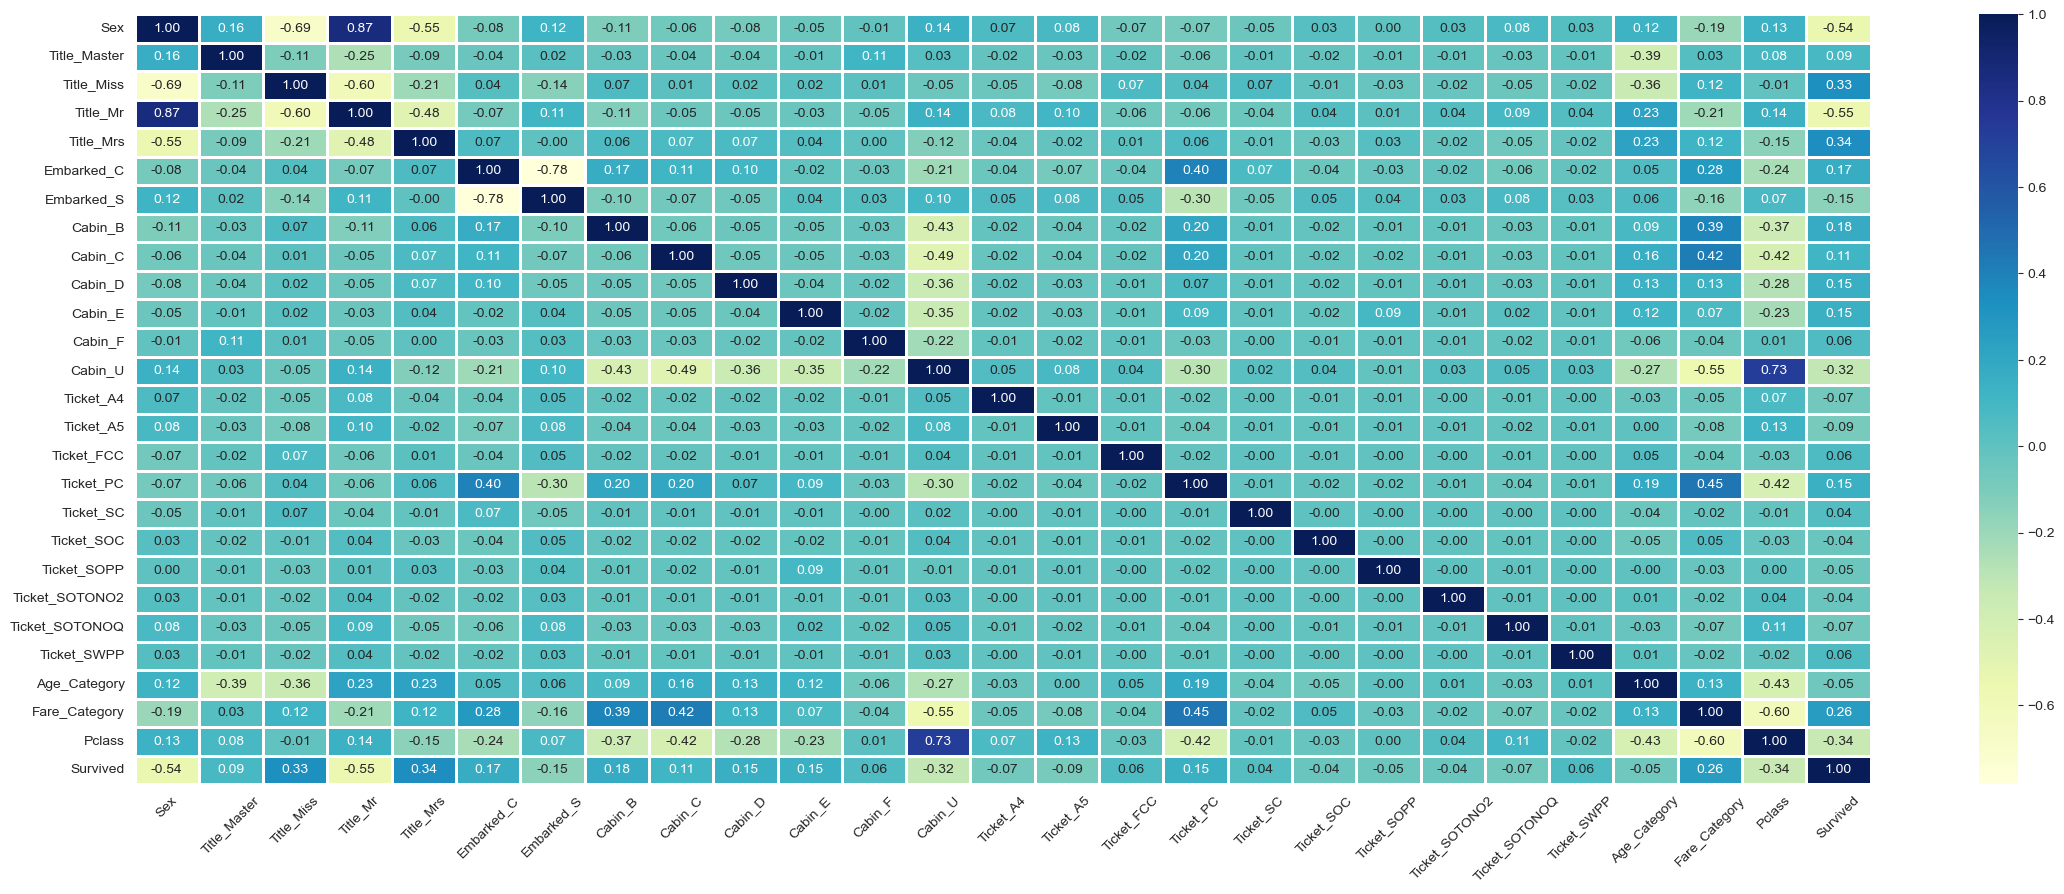

In [92]:
fig=plt.figure(figsize=(28,10))
sns.set_style('darkgrid',rc={'axes.facecolor': '#eaf'})
sns.set_palette('viridis',15)
sns.heatmap(train_df4.corr(),annot=True,fmt = ".2f",cmap="YlGnBu",linewidths=1)  
plt.xticks(rotation= 45) 
plt.show()

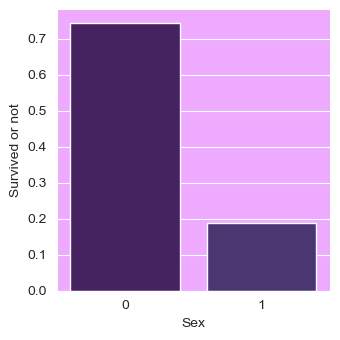

In [98]:
g = sns.factorplot( x = "Sex", y = "Survived", data = train_df4,ci=None, kind = "bar", size = 3.5)
g.set_ylabels("Survived or not")
plt.show()

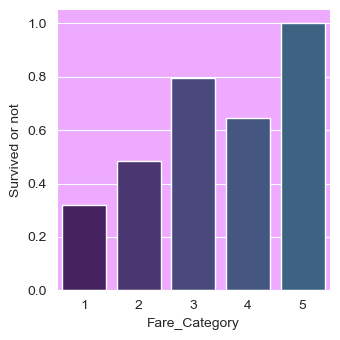

In [102]:
g = sns.factorplot( x = "Fare_Category", y = "Survived", data = train_df4,ci=None, kind = "bar", size = 3.5)
g.set_ylabels("Survived or not")
plt.show()

In [187]:
print(f"Training Accuracy with logistic regression       : {0.81}");
print(f"Accuracy with logistic regression after splitting: {0.77}");
print("----------------------------------      ");
print(f"Training Accuracy with Shallow ANN               : {0.88}");
print(f"Accuracy with Shallow ANN after splitting        : {0.93}");

Training Accuracy with logistic regression       : 0.81
Accuracy with logistic regression after splitting: 0.77
----------------------------------      
Training Accuracy with Shallow ANN               : 0.88
Accuracy with Shallow ANN after splitting        : 0.93


In [104]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             891 non-null    int64
 1   Title_Master    891 non-null    int64
 2   Title_Miss      891 non-null    int64
 3   Title_Mr        891 non-null    int64
 4   Title_Mrs       891 non-null    int64
 5   Embarked_C      891 non-null    int64
 6   Embarked_S      891 non-null    int64
 7   Cabin_B         891 non-null    int64
 8   Cabin_C         891 non-null    int64
 9   Cabin_D         891 non-null    int64
 10  Cabin_E         891 non-null    int64
 11  Cabin_F         891 non-null    int64
 12  Cabin_U         891 non-null    int64
 13  Ticket_A4       891 non-null    int64
 14  Ticket_A5       891 non-null    int64
 15  Ticket_FCC      891 non-null    int64
 16  Ticket_PC       891 non-null    int64
 17  Ticket_SC       891 non-null    int64
 18  Ticket_SOC      891 non-null  

In [ ]:
#STOP

In [108]:
train_df4.sort_values('Survived',ascending=False, inplace = True);      
train_df4.reset_index(drop = True, inplace = True) 

In [116]:
train_df4.head(2)

,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_U,Ticket_A4,Ticket_A5,Ticket_FCC,Ticket_PC,Ticket_SC,Ticket_SOC,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SWPP,Age_Category,Fare_Category,Pclass,Survived
0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1
1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,3,1,1


In [112]:
train_df4.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [117]:
zeros_survived=train_df4[342:];
ones_survived= train_df4[:342];
print("zeros_survived: {}\nones_survived : {}".format(zeros_survived.shape, ones_survived.shape))

zeros_survived: (549, 27)
ones_survived : (342, 27)


In [118]:
train_ones=ones_survived.sample(frac=0.8,random_state=200)
test_ones=ones_survived.drop(train_ones.index)

In [119]:
train_zeros=zeros_survived.sample(frac=0.8,random_state=200)
test_zeros=zeros_survived.drop(train_zeros.index)

In [120]:
train_ones.Survived.value_counts()

1    274
Name: Survived, dtype: int64

In [122]:
train_zeros.Survived.value_counts()

0    439
Name: Survived, dtype: int64

In [123]:
test_ones.Survived.value_counts()

1    68
Name: Survived, dtype: int64

In [124]:
test_zeros.Survived.value_counts()

0    110
Name: Survived, dtype: int64

In [131]:
train_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 715 to 437
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             439 non-null    int64
 1   Title_Master    439 non-null    int64
 2   Title_Miss      439 non-null    int64
 3   Title_Mr        439 non-null    int64
 4   Title_Mrs       439 non-null    int64
 5   Embarked_C      439 non-null    int64
 6   Embarked_S      439 non-null    int64
 7   Cabin_B         439 non-null    int64
 8   Cabin_C         439 non-null    int64
 9   Cabin_D         439 non-null    int64
 10  Cabin_E         439 non-null    int64
 11  Cabin_F         439 non-null    int64
 12  Cabin_U         439 non-null    int64
 13  Ticket_A4       439 non-null    int64
 14  Ticket_A5       439 non-null    int64
 15  Ticket_FCC      439 non-null    int64
 16  Ticket_PC       439 non-null    int64
 17  Ticket_SC       439 non-null    int64
 18  Ticket_SOC      439 non-null

In [132]:
df_train= pd.concat([train_ones,train_zeros], ignore_index = True)
df_test=pd.concat([test_ones,test_zeros], ignore_index = True)

In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             178 non-null    int64
 1   Title_Master    178 non-null    int64
 2   Title_Miss      178 non-null    int64
 3   Title_Mr        178 non-null    int64
 4   Title_Mrs       178 non-null    int64
 5   Embarked_C      178 non-null    int64
 6   Embarked_S      178 non-null    int64
 7   Cabin_B         178 non-null    int64
 8   Cabin_C         178 non-null    int64
 9   Cabin_D         178 non-null    int64
 10  Cabin_E         178 non-null    int64
 11  Cabin_F         178 non-null    int64
 12  Cabin_U         178 non-null    int64
 13  Ticket_A4       178 non-null    int64
 14  Ticket_A5       178 non-null    int64
 15  Ticket_FCC      178 non-null    int64
 16  Ticket_PC       178 non-null    int64
 17  Ticket_SC       178 non-null    int64
 18  Ticket_SOC      178 non-null  

In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             713 non-null    int64
 1   Title_Master    713 non-null    int64
 2   Title_Miss      713 non-null    int64
 3   Title_Mr        713 non-null    int64
 4   Title_Mrs       713 non-null    int64
 5   Embarked_C      713 non-null    int64
 6   Embarked_S      713 non-null    int64
 7   Cabin_B         713 non-null    int64
 8   Cabin_C         713 non-null    int64
 9   Cabin_D         713 non-null    int64
 10  Cabin_E         713 non-null    int64
 11  Cabin_F         713 non-null    int64
 12  Cabin_U         713 non-null    int64
 13  Ticket_A4       713 non-null    int64
 14  Ticket_A5       713 non-null    int64
 15  Ticket_FCC      713 non-null    int64
 16  Ticket_PC       713 non-null    int64
 17  Ticket_SC       713 non-null    int64
 18  Ticket_SOC      713 non-null  

In [136]:
X7=df_train.to_numpy();
ytrain=X7[:,-1];
Xtrain=X7[:,0:-1];
print("Xtrain: {}\nytrain : {}".format(Xtrain.shape, ytrain.shape))

Xtrain: (713, 26)
ytrain : (713,)


In [137]:
X8=df_test.to_numpy();
ytest=X8[:,-1];
Xtest=X8[:,0:-1];
print("Xtrain: {}\nytrain : {}".format(Xtest.shape, ytest.shape))

Xtrain: (178, 26)
ytrain : (178,)


In [ ]:
# test=test.reshape(-1, 712);
# test1=test.to_numpy();
# ytest=test1[:,-1];
# Xtest=test1[:,0:-1]  #.reshape(-1, 712);    #[:,0:-1]
# #Xtest=X4.reshape(-1, 712)
# print("Xtest: {}\nytest : {}".format(Xtest.shape, ytest.shape))

In [182]:
multlogreg=MVLogisticRegression();
multlogreg.fit(Xtrain,ytrain,eta=9e-3,epochs=1e5,show_curve=True);  #eta=9e-2,epochs=2e3>80  

In [183]:
ytrain_hat = multlogreg.predict(Xtrain);
round(accuracy(ytrain,ytrain_hat),3) 

0.774

In [186]:
#ytest_hat=multlogreg.predict(Xtest)

In [185]:
accuracy(ytrain,ytrain_hat)

0.7741935483870968

In [142]:
Xtest.shape

(178, 26)

In [155]:
def main5():
    D =2
    K = 3
    N= int(K*1e3)
    X = df_test.drop(labels = "Survived", axis= 1)
    X = X.values
    y = df_test["Survived"].values

    my_ann = Shallow_ANN()

    my_ann.fit(X,y, neurons=30, eta =3e-3, epochs=1e+5, show_curve=True)
    y_hat =my_ann.predict(X)

    print (f"Test Accuracy: {accuracy(y,y_hat):0.4f}")

    print(my_ann.W)
    print(my_ann.B)

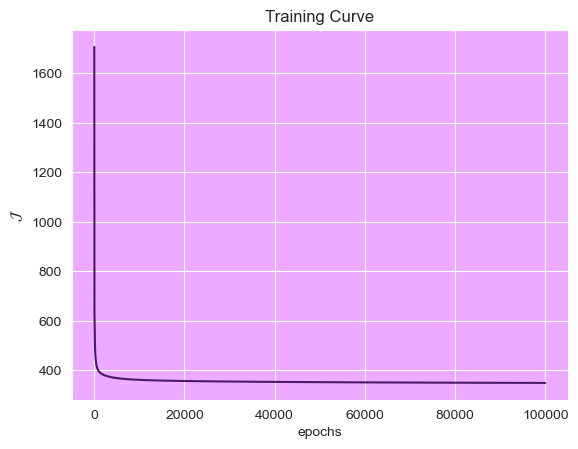

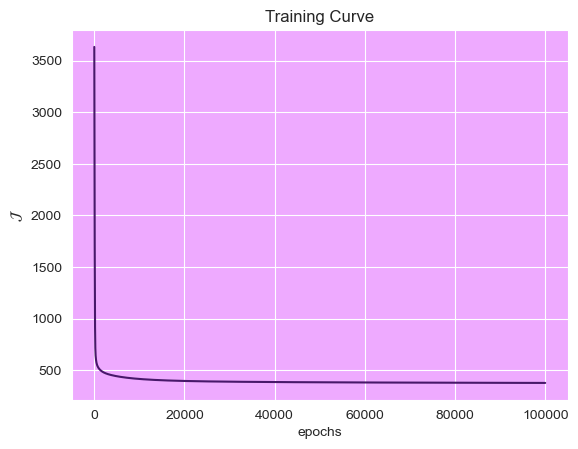

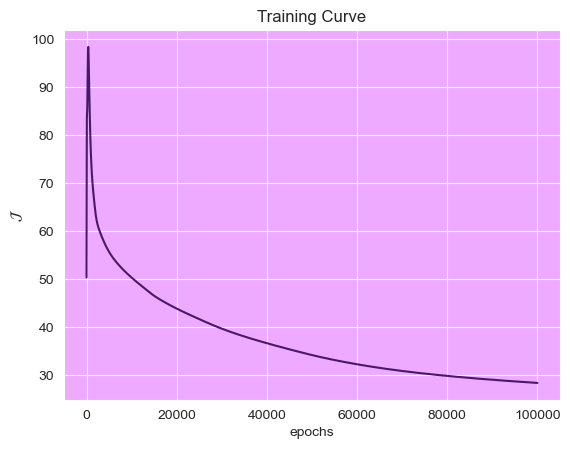

Test Accuracy: 0.9382
{1: array([[ 7.75875230e-01, -2.37151533e+00, -6.24599329e-01,
        -2.26519962e-01, -5.54385877e-01, -4.64725262e-01,
        -8.07419010e-02, -8.51289710e-01,  1.29812436e+00,
        -1.29563143e+00, -1.12669386e+00,  1.86385359e+00,
         5.56031110e-01,  3.82966228e-02, -8.24007909e-01,
         2.32566000e+00,  2.20514972e-01, -7.15686328e-01,
        -7.75156744e-01,  2.26932059e-01, -5.15752827e-01,
        -6.51839006e-01, -1.93124832e-01,  2.52755624e+00,
        -5.39808693e-01,  4.16548956e-01, -2.23147012e+00,
         1.85160524e+00, -1.17782031e-02,  5.15121432e-01],
       [-1.40439442e+00, -1.76358058e+00,  2.01211067e+00,
        -1.10329069e+00,  9.52496171e-01,  1.64329399e-01,
         7.60648777e-01,  5.98951656e-01,  4.38116491e-01,
         6.64794654e-01, -4.11585976e-01,  1.21141597e+00,
         8.75740531e-01,  2.44975226e+00,  1.04948186e+00,
         2.22280291e+00,  1.02042810e+00,  2.01640962e-02,
        -1.58479195e+00,  7.8

In [156]:
if __name__=="__main__":
    main5()